##  Homework 1 - Problem 5 : Self-fulfilling prophecies

### Student: Dimitrios Tanoglidis

In [25]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

#### (a) 

We want to simulate 1000 points from the bivariate normal distribution N($\mu, \Sigma$), with

\begin{equation}
\mu = 0, \Sigma = \left(\begin{matrix} 
1 & 0 \\
0 & 1 
\end{matrix}\right)
\end{equation}

I will use the routine random.multivariate_normal from numpy for that, providing the above covariance matrix.

In [26]:
mean = [0,0] #mean
cov = [[1,0],[0,1]] #the diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 1000).T

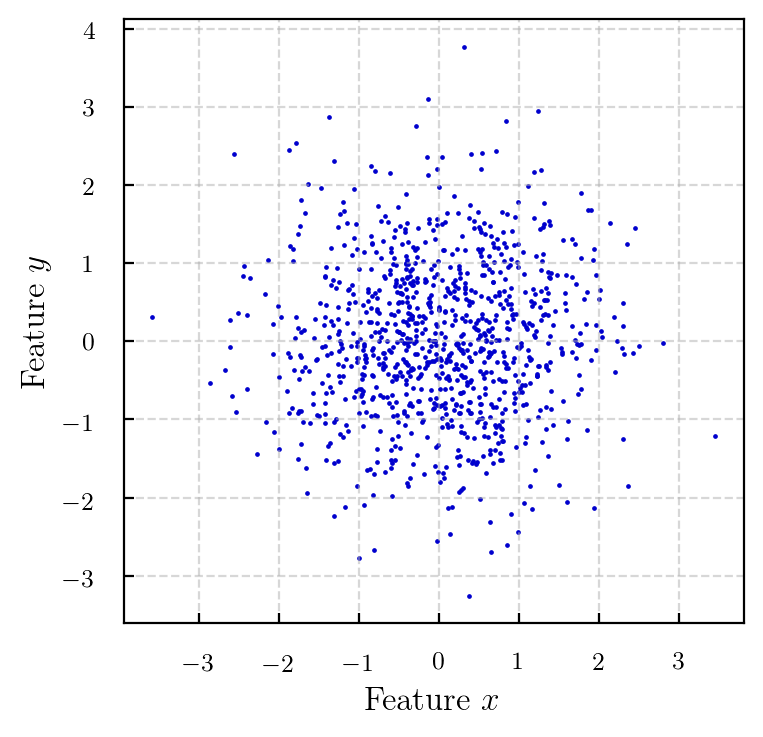

In [30]:
# Let's plot the data

fig = plt.figure(figsize = (4.0,4.0))

plt.scatter(x,y, s=0.5, color='mediumblue')
plt.xlabel('Feature $x$', fontsize=12);plt.ylabel('Feature $y$', fontsize=12)
plt.grid(ls='--',alpha=0.5)
plt.show()

#### (b) Fit a 3 cluster model

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(3) #Initialize a KMeans model with three clusters

# Create a matrix of features
X_feat = np.zeros([1000,2])
#First feature is x, second feature is y
X_feat[:,0] = x; X_feat[:,1] = y

In [37]:
# Fit and predict the labels of the clusters
labels = kmeans.fit_predict(X_feat)

# Get the three cluster centers
centers = kmeans.cluster_centers_

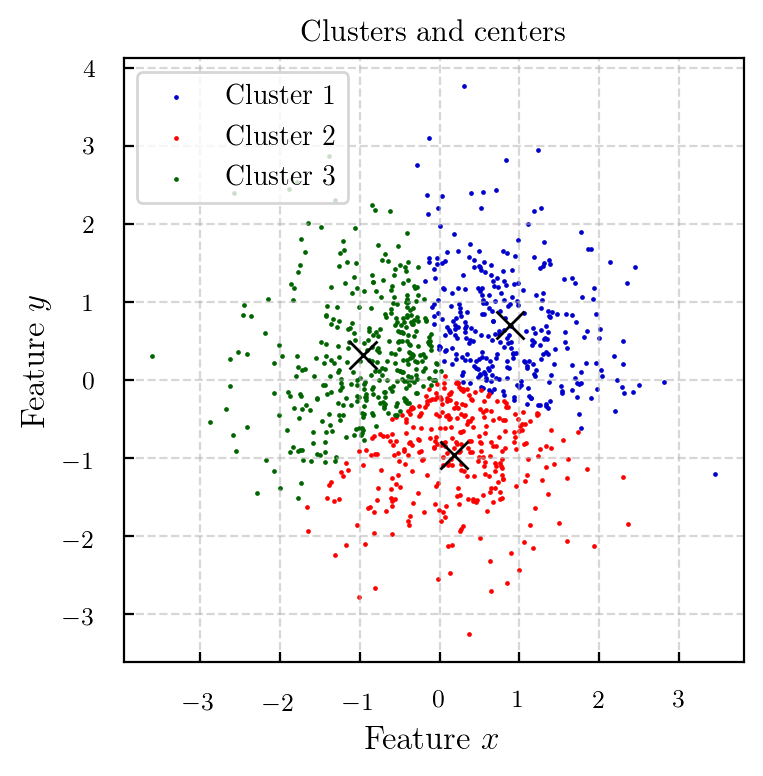

In [52]:
# Let's plot the three clusters and the centers

fig = plt.figure(figsize = (4.0,4.0))


plt.scatter(x[labels==0],y[labels==0], s=0.5, color='mediumblue', label='Cluster 1')
plt.scatter(x[labels==1],y[labels==1], s=0.5, color='red', label='Cluster 2')
plt.scatter(x[labels==2],y[labels==2], s=0.5, color='darkgreen', label='Cluster 3')

plt.plot(centers[0,0], centers[0,1], c='k', marker='x', markersize=10)
plt.plot(centers[1,0], centers[1,1], c='k', marker='x', markersize=10)
plt.plot(centers[2,0], centers[2,1], c='k', marker='x', markersize=10)

plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel('Feature $x$', fontsize=12);plt.ylabel('Feature $y$', fontsize=12)
plt.grid(ls='--',alpha=0.5)

plt.title('Clusters and centers')
plt.show()


#### (c) 

Here we modify the data points as: $ x_i = 0.99x_i + 0.01c_i$, with $c_i$ being the cluster center assigned to the $i$-th data point.

In [82]:
X_feat_clust1 = X_feat[labels==0] # Positions (features) of the first cluster
X_feat_clust2 = X_feat[labels==1] # Positions (features) of the second cluster
X_feat_clust3 = X_feat[labels==2] # Positions (features) of the third cluster

# Update them according to the above rule
X_ft_clust1_new = 0.99*X_feat_clust1 + 0.01*centers[0]
X_ft_clust2_new = 0.99*X_feat_clust2 + 0.01*centers[1]
X_ft_clust3_new = 0.99*X_feat_clust3 + 0.01*centers[2]

# Collect all features in a new array now

X_feat_new = np.concatenate((X_ft_clust1_new, X_ft_clust2_new, X_ft_clust3_new))

In [83]:
# perform new clustering now
# Fit and predict the labels of the clusters
labels_new = kmeans.fit_predict(X_feat_new)
# Get the three cluster centers
centers_new = kmeans.cluster_centers_

Let's plot the new clusters to see them. Also, I will print the old and new centers...

In [84]:
print("The old centers are:")
print(centers)
print("The new centers are:")
print(centers_new)

The old centers are:
[[ 0.87989623  0.70219452]
 [ 0.18718605 -0.95852588]
 [-0.95098082  0.32205408]]
The new centers are:
[[ 0.8788137   0.70575037]
 [ 0.19031612 -0.95689076]
 [-0.95098082  0.32205408]]


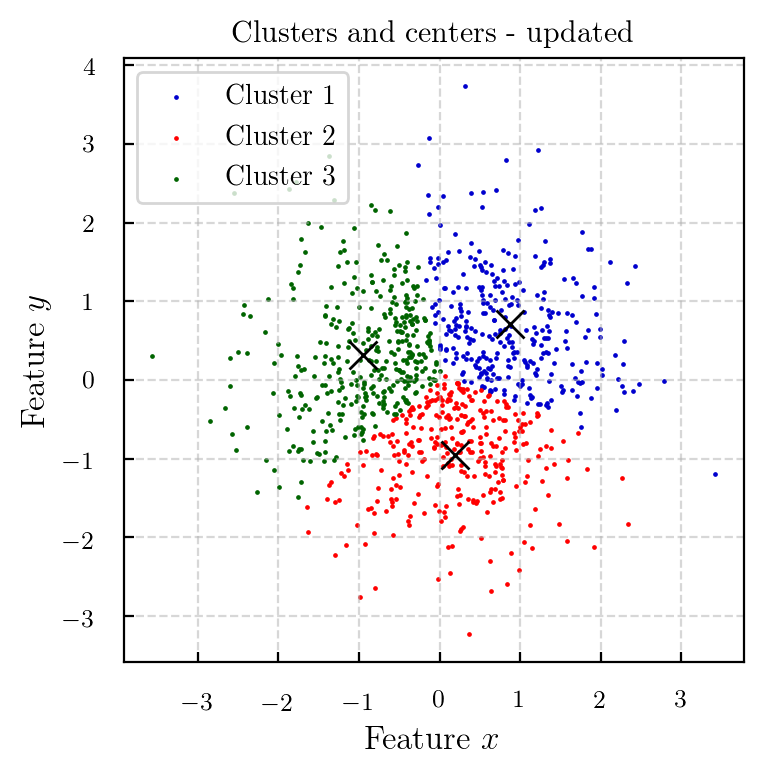

In [86]:
x_new = X_feat_new[:,0]
y_new = X_feat_new[:,1]


fig = plt.figure(figsize = (4.0,4.0))


plt.scatter(x_new[labels_new==0],y_new[labels_new==0], s=0.5, color='mediumblue', label='Cluster 1')
plt.scatter(x_new[labels_new==1],y_new[labels_new==1], s=0.5, color='red', label='Cluster 2')
plt.scatter(x_new[labels_new==2],y_new[labels_new==2], s=0.5, color='darkgreen', label='Cluster 3')

plt.plot(centers_new[0,0], centers_new[0,1], c='k', marker='x', markersize=10)
plt.plot(centers_new[1,0], centers_new[1,1], c='k', marker='x', markersize=10)
plt.plot(centers_new[2,0], centers_new[2,1], c='k', marker='x', markersize=10)

plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.xlabel('Feature $x$', fontsize=12);plt.ylabel('Feature $y$', fontsize=12)
plt.grid(ls='--',alpha=0.5)

plt.title('Clusters and centers - updated')
plt.show()

#### (d) We now repeat the above process 50 times (weeks)

In [87]:
# Initialize as "old" the initial clusters and centers etc...
X_feat_old = X_feat
labels_old = labels
centers_old = centers

for i in range(50):
    
    # Separate them into the three clusters
    X_feat_clust1 = X_feat_old[labels_old==0] # First cluster
    X_feat_clust2 = X_feat_old[labels_old==1] # Second cluster
    X_feat_clust3 = X_feat_old[labels_old==2] # Third cluster
    
    # Update them according to the above rule
    X_ft_clust1_new = 0.99*X_feat_clust1 + 0.01*centers_old[0]
    X_ft_clust2_new = 0.99*X_feat_clust2 + 0.01*centers_old[1]
    X_ft_clust3_new = 0.99*X_feat_clust3 + 0.01*centers_old[2]
    
    # Collect all features in a new array
    X_feat_new = np.concatenate((X_ft_clust1_new, X_ft_clust2_new, X_ft_clust3_new))
    # ==============================================================================
    # perform new clustering now
    
    # Fit and predict the labels of the clusters
    labels_new = kmeans.fit_predict(X_feat_new)
    # Get the three cluster centers
    centers_new = kmeans.cluster_centers_
    
    # ====================================================
    # ====================================================
    # Now, rename the "new" as "old" in order
    # to start over from the beginning
    
    X_feat_old = X_feat_new
    labels_old = labels_new
    centers_old = centers_new
    
    

Let's now plot the original and the updated data cloud 

In [ ]:
x_new = X_feat_new[:,0]
y_new = X_feat_new[:,1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8.5,4.0))




ax[0].scatter(x[labels==0],y[labels==0], s=0.5, color='mediumblue', label='Cluster 1')
ax[0].scatter(x[labels==1],y[labels==1], s=0.5, color='red', label='Cluster 2')
ax[0].scatter(x[labels==2],y[labels==2], s=0.5, color='darkgreen', label='Cluster 3')

ax[0].plot(centers[0,0], centers[0,1], c='k', marker='x', markersize=10)
ax[0].plot(centers[1,0], centers[1,1], c='k', marker='x', markersize=10)
ax[0].plot(centers[2,0], centers[2,1], c='k', marker='x', markersize=10)

ax[0].legend(frameon=True, loc='upper left', fontsize=10)
ax[0].set_xlabel('Feature $x$', fontsize=12);ax[0].set_ylabel('Feature $y$', fontsize=12)
ax[0].grid(ls='--',alpha=0.5)

ax[0].set_title('Clusters and centers - original')



ax[1].scatter(x_new[labels_new==0],y_new[labels_new==0], s=0.5, color='red', label='Cluster 1')
ax[1].scatter(x_new[labels_new==1],y_new[labels_new==1], s=0.5, color='mediumblue', label='Cluster 2')
ax[1].scatter(x_new[labels_new==2],y_new[labels_new==2], s=0.5, color='darkgreen', label='Cluster 3')

ax[1].plot(centers_new[0,0], centers_new[0,1], c='k', marker='x', markersize=10)
ax[1].plot(centers_new[1,0], centers_new[1,1], c='k', marker='x', markersize=10)
ax[1].plot(centers_new[2,0], centers_new[2,1], c='k', marker='x', markersize=10)

ax[1].legend(frameon=True, loc='upper left', fontsize=10)
ax[1].set_xlabel('Feature $x$', fontsize=12);ax[1].set_ylabel('Feature $y$', fontsize=12)
ax[1].grid(ls='--',alpha=0.5)

ax[1].set_title('Clusters and centers - Final')


plt.show()